In [2]:
from msd.SpeakerDiarizer import SpeakerDiarizer

In [3]:
from pyannote.database.util import load_rttm

In [4]:
!pwd

/Users/jauffret/code/MartinJ9678/meetings-speaker-diarization/notebooks/martin


In [7]:
meeting_rttm = load_rttm("outputs/rttm_meeting.rttm")

In [13]:
i=0
for segment in meeting_rttm['<NA>'].itersegments():
    i+=1
    print(segment)
    print(i)

[ 00:00:29.336 -->  00:00:30.095]
1
[ 00:00:32.918 -->  00:00:36.239]
2
[ 00:00:36.393 -->  00:00:38.801]
3
[ 00:00:39.305 -->  00:00:44.584]
4
[ 00:00:45.379 -->  00:00:54.414]
5
[ 00:00:54.793 -->  00:00:58.104]
6
[ 00:00:58.281 -->  00:01:02.159]
7
[ 00:01:02.935 -->  00:01:08.038]
8
[ 00:01:08.469 -->  00:01:09.242]
9
[ 00:01:09.803 -->  00:01:10.817]
10
[ 00:01:10.818 -->  00:01:12.176]
11
[ 00:01:12.539 -->  00:01:12.735]
12
[ 00:01:13.219 -->  00:01:22.851]
13
[ 00:01:22.851 -->  00:01:22.885]
14
[ 00:01:23.357 -->  00:01:24.378]
15
[ 00:01:24.675 -->  00:01:25.208]
16
[ 00:01:25.955 -->  00:01:33.156]
17
[ 00:01:33.542 -->  00:01:34.811]
18
[ 00:01:35.523 -->  00:01:37.028]
19
[ 00:01:37.521 -->  00:01:40.287]
20
[ 00:01:40.286 -->  00:01:42.438]
21
[ 00:01:42.733 -->  00:01:46.619]
22
[ 00:01:47.420 -->  00:01:50.046]
23
[ 00:01:50.660 -->  00:01:51.553]
24
[ 00:01:51.969 -->  00:01:57.089]
25
[ 00:01:57.565 -->  00:01:58.577]
26
[ 00:01:59.097 -->  00:02:00.825]
27
[ 00:02:01

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
from msd.SpeakerAward import SpeakerAward

In [18]:
from msd.SpeakerDiarizer import SpeakerDiarizer

In [20]:
diarizer = SpeakerDiarizer('dia_dihard')

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master


In [21]:
diarizer.diarization = meeting_rttm['<NA>']

In [23]:
diarizer.current_filename = "data/Rue-Saint-Maur-3.wav"

In [24]:
award = SpeakerAward(diarizer)

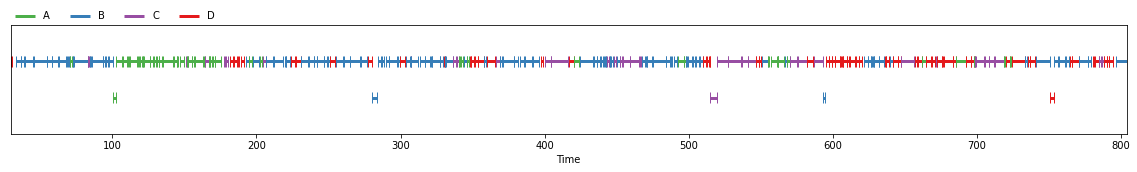

In [29]:
diarizer.diarization

In [90]:
for count, (segment, _, label) in enumerate(diarizer.diarization.itertracks(yield_label=True)):
    print (label,segment.start)

D 29.336
B 32.918
B 36.393
B 39.305
B 45.379
B 54.793
B 58.281
B 62.935
B 68.469
B 69.803
A 70.818
B 72.539
B 73.219
C 82.851
C 83.357
B 84.675
B 85.955
B 93.542
B 95.523
B 97.521
A 100.286
A 102.733
A 107.42
A 110.66
A 111.969
A 117.565
A 119.097
A 121.211
A 121.787
A 125.992
A 128.657
A 130.663
A 132.536
A 134.792
A 142.855
A 144.928
A 146.73
C 150.792
A 151.607
A 152.695
A 155.231
A 157.255
A 163.271
C 164.584
A 167.174
A 167.92
A 169.898
A 171.217
C 177.211
C 178.674
D 181.371
D 184.182
D 187.179
D 188.956
B 192.466
A 194.981
B 197.466
A 202.289
C 204.54
B 206.305
B 212.168
B 219.589
B 220.381
D 223.997
D 227.198
B 230.793
B 236.598
B 240.076
B 241.853
B 247.069
B 249.531
D 250.798
B 255.089
B 260.643
B 265.007
B 272.779
D 277.341
B 279.993
B 284.126
B 287.081
B 289.727
B 292.177
B 298.421
D 299.995
B 304.13
C 306.985
B 306.997
B 313.357
B 317.211
B 320.833
B 321.815
B 327.756
D 329.923
B 331.172
B 331.54
C 336.125
C 339.01
A 340.905
A 342.009
B 344.368
A 346.177
D 348.248
D 349.22

In [86]:
liste_speaker = [label[2] for label in diarizer.diarization.itertracks(yield_label=True)]
liste_speaker[0:15]

['D', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'C', 'C']

In [103]:
for count, (segment, _, label) in enumerate(diarizer.diarization.itertracks(yield_label=True)):
            if count!=len(liste_speaker)-1 and label == liste_speaker[count+1]:
                if count != 0 and label == liste_speaker[count-1]:
                    print('milieu',t1)
                    continue
                else:
                    t1 = segment.start * 1000
                    print('debut',t1)
                    continue
            elif count!=0 and label == liste_speaker[count-1]:
                print('fin',t1)
            else:
                t1=segment.start
                print('tout seul',t1)
            t2 = segment.start+segment.duration
            print(f't2={t2}')

tout seul 29.336
t2=30.095
debut 32918.0
milieu 32918.0
milieu 32918.0
milieu 32918.0
milieu 32918.0
milieu 32918.0
milieu 32918.0
milieu 32918.0
fin 32918.0
t2=70.817
tout seul 70.818
t2=72.176
debut 72539.0
fin 72539.0
t2=82.851
debut 82851.0
fin 82851.0
t2=84.378
debut 84675.0
milieu 84675.0
milieu 84675.0
milieu 84675.0
fin 84675.0
t2=100.287
debut 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
milieu 100286.0
fin 100286.0
t2=149.96699999999998
tout seul 150.792
t2=151.607
debut 151607.0
milieu 151607.0
milieu 151607.0
milieu 151607.0
fin 151607.0
t2=164.182
tout seul 164.584
t2=166.903
debut 167174.0
milieu 167174.0
milieu 167174.0
fin 167174.0
t2=175.11800000000002
debut 177211.0
fin 177211.0
t2=180.14700000000002
debut 181371.0
milieu 181371.0
milieu 181371.0
fin 181371.0
t2=191.511
tout seul 192

In [110]:
import time
import azure.cognitiveservices.speech as speechsdk
from azure.cognitiveservices.speech import audio
import pydub
import os

In [115]:
speech_config = speechsdk.SpeechConfig(subscription=os.getenv('AZURE_API_KEY'), region="francecentral", speech_recognition_language = 'fr-FR')
def get_json():
        load_dotenv()
        json_outputs = []
        audio_wave = pydub.AudioSegment.from_wav(diarizer.current_filename)
        liste_speaker = [label for segment,_,label in diarizer.diarization.itertracks(yield_label=True)]
        for count, (segment, _, label) in enumerate(diarizer.diarization.itertracks(yield_label=True)):
            if count!=len(liste_speaker)-1 and label == liste_speaker[count+1]:
                if count != 0 and label == liste_speaker[count-1]:
                    continue
                else:
                    t1 = segment.start * 1000
                    continue
            elif count!=0 and label == liste_speaker[count-1]:
                pass
            else:
                t1 = segment.start *1000         
            t2 = (segment.start + segment.duration) * 1000
            count_store = -1
            newAudio = audio_wave[t1:t2]
            newAudio.export(f"temp.wav", format="wav")
            audio_config = speechsdk.audio.AudioConfig(filename="temp.wav")
            speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)
            result = speech_recognizer.recognize_once_async().get()
            json_outputs.append({'speaker':label,
                                  'start':time.strftime("%H:%M:%S",time.gmtime(t1/1000)),
                                  'end':time.strftime("%H:%M:%S",time.gmtime(t2/1000)),
                                  'text':result.text})
        return json_outputs

In [116]:
outputs_regrspeaker = get_json()

In [118]:
len(outputs_regrspeaker)

94

In [120]:
outputs_regrspeaker

[{'speaker': 'D', 'start': '00:00:29', 'end': '00:00:30', 'text': ''},
 {'speaker': 'B',
  'start': '00:00:32',
  'end': '00:01:10',
  'text': 'OKE alors du coup ?'},
 {'speaker': 'A', 'start': '00:01:10', 'end': '00:01:12', 'text': ''},
 {'speaker': 'B',
  'start': '00:01:12',
  'end': '00:01:22',
  'text': "Et du coup, Euh, Lapillonne, tu me dis, elle était genre, ouais, la fille, c'est bon, c'est la pic. OK et d'autorisation c'est encore c'est ça. Ouais là je suis en train de faire le docteur."},
 {'speaker': 'C', 'start': '00:01:22', 'end': '00:01:24', 'text': 'ATM.'},
 {'speaker': 'B',
  'start': '00:01:24',
  'end': '00:01:40',
  'text': "Voilà. Du coup, on ferait partie ça comme ça. Donc on a avancé un petit peu chacun sur nos partis. Depuis hier, on a parlé du Démo Day à l'instant là, comment les comment ? On a le faire le truc donc on s'est mis d'accord sur un."},
 {'speaker': 'A',
  'start': '00:01:40',
  'end': '00:02:29',
  'text': "Il y avait plusieurs possibilités. Après 

In [ ]:
outputs = award.get_json()
outputs

In [102]:
outputs_segmentparsegment = outputs

In [119]:
len(outputs_segmentparsegment)

236

In [121]:
outputs_segmentparsegment

[{'speaker': 'D', 'start': '00:00:29', 'end': '00:00:30', 'text': ''},
 {'speaker': 'B',
  'start': '00:00:32',
  'end': '00:00:36',
  'text': 'OKE alors du coup ?'},
 {'speaker': 'B',
  'start': '00:00:36',
  'end': '00:00:38',
  'text': 'Oui, pour faire un petit point par rapport à hier.'},
 {'speaker': 'B',
  'start': '00:00:39',
  'end': '00:00:44',
  'text': "En gros, on s'est réparti le boulot un peu pour avoir une V 0 ce soir. Famine vers la mairie."},
 {'speaker': 'B',
  'start': '00:00:45',
  'end': '00:00:54',
  'text': "Donc du coup, moi j'étais plus partie sur le front. Ouais et on s'est mis d'accord sur un format jeason particulier qu'on a mis en commun pour que du coup."},
 {'speaker': 'B',
  'start': '00:00:54',
  'end': '00:00:58',
  'text': 'Martin puisse générer un Python lemon Gisèle.'},
 {'speaker': 'B',
  'start': '00:00:58',
  'end': '00:01:02',
  'text': "Et Yoann et sur la partie d'autorisation du coup création de l'API."},
 {'speaker': 'B',
  'start': '00:01:02